In [1]:
#import required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# show descriptives of the dataset
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
The above output shows the descriptive statistics for all columns in the dataset.  
The mean age is of individuals is 39, the maximum age is 64, while the minimum is 18.  
Males have a greater representation (676) in the dataset than females.  
Majority of the respondents are non-smokers (1064).  
Southeast region has the most respondents in the dataset (364).

In [5]:
# show column details
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


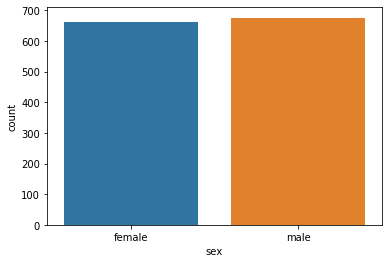

In [6]:
# visualize the sex distribution
sns.countplot(data=insurance, x= 'sex')

# show the plot
plt.show()

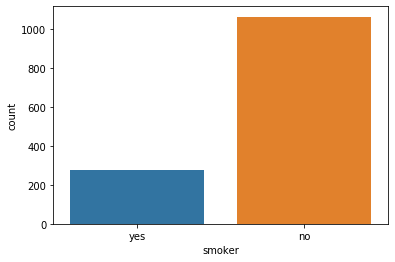

In [7]:
# visualize smokers distribution
sns.countplot(data = insurance, x = 'smoker')

# show the plot
plt.show()

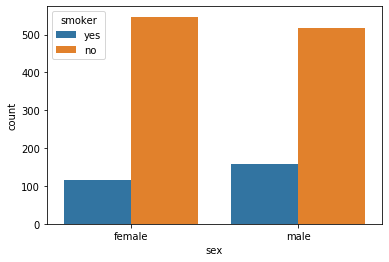

In [8]:
# show the  of charges for each sex
sns.countplot(data = insurance, x='sex', hue='smoker')

# show the plot
plt.show()
#The above plot shows amongst the smokers, that there are more male smokers than females smokers.

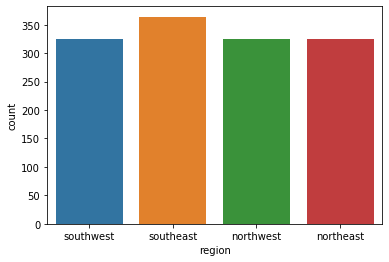

In [9]:
# show the distribution of respondents region
sns.countplot(data=insurance , x = 'region')
plt.show()
#The above plot shows that majority of the respondents are from the southeast region, while the other regions have an almost equal representation of respondents.

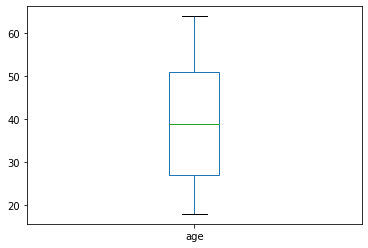

In [10]:
# show the distribution respondents age
insurance.boxplot(column='age', grid=False)

# show the plot
plt.show()
#The above chart shows that 25% of respondents are below 25 years, 50% are below 40 years and 75% are below 52 years.

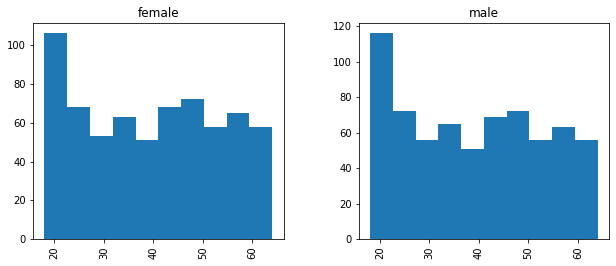

In [11]:
# show the distribution of ages of respondents
insurance.hist(column='age', grid=False, by= 'sex', figsize= (10, 4))

# show the plot
plt.show()
#The above histogram plots show age is right skewed for both sexes that majority of the respondents are above 30 years old for both genders.

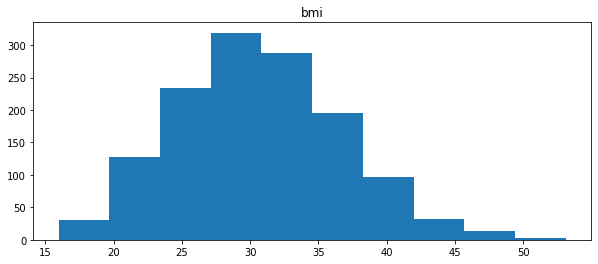

In [12]:
# show the distribution of BMI
insurance.hist(column='bmi', grid=False, figsize= (10, 4))

# show the plot
plt.show()
#The BMI of respondents is slightly skewed to the right, indicating that most respondents have BMI greater than 30

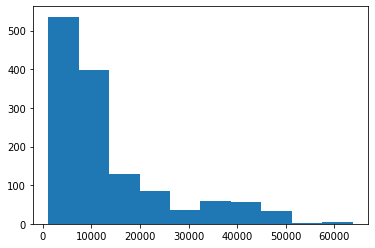

In [13]:
# plot the distribution of insurance charges
plt.hist(insurance['charges'])

# show the plot
plt.show()
#The above plot shows that the charges for insurance is right skewed. This invariably means that majority of the respondents are charged greater than mean insurance charge (13270.422265)

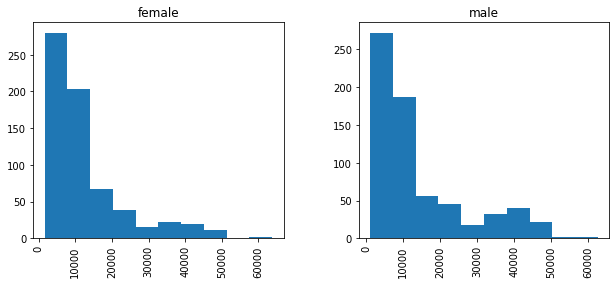

In [14]:
# plot the distribution of charges between gender 
insurance.hist(column='charges', by='sex', grid=False, figsize=(10, 4))

# show the plot
plt.show()
#The above plot shows that the charges for insurance is right skewed for both sexes. This implies that majority of both male and female respondents are charged greater than mean insurance charge (13270.422265)

In [15]:
#Converting objects labels into categorical
insurance[['sex', 'smoker', 'region']] = insurance[['sex', 'smoker', 'region']].astype('category')
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [16]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(insurance.sex.drop_duplicates())
insurance.sex = label.transform(insurance.sex)

label.fit(insurance.smoker.drop_duplicates())
insurance.smoker = label.transform(insurance.smoker)

label.fit(insurance.region.drop_duplicates())
insurance.region = label.transform(insurance.region)

insurance.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [17]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
#Defining the feature varibles and the target variable by droping child mortality in x and sing it in y
y = insurance['charges'].values
x = insurance.drop(['charges'], axis= 1).values

In [20]:
#Creating training and test sets, using 30 of data set to test and 70% to train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [  261.62568984   109.64719595   344.54483066   424.37016596
 23620.80252148  -326.46262527]
Intercept: -12364.391322279233
Mean squared error (MSE): 33805466.90
Coefficient of determination (R^2): 0.77


In [23]:
import seaborn as sns
import numpy as np
np.array(y_test)


array([ 9095.06825 ,  5272.1758  , 29330.98315 ,  9301.89355 ,
       33750.2918  ,  4536.259   ,  2117.33885 , 14210.53595 ,
        3732.6251  , 10264.4421  , 18259.216   ,  7256.7231  ,
        3947.4131  , 46151.1245  , 48673.5588  , 44202.6536  ,
        9800.8882  , 42969.8527  ,  8233.0975  , 21774.32215 ,
        5080.096   ,  7441.501   ,  1256.299   ,  2755.02095 ,
       11085.5868  , 10923.9332  , 12644.589   , 18804.7524  ,
        9715.841   ,  1131.5066  , 15828.82173 , 11842.62375 ,
        2020.5523  ,  5693.4305  ,  2904.088   ,  7448.40395 ,
        2597.779   ,  7337.748   , 23887.6627  , 38709.176   ,
        4687.797   ,  2643.2685  , 11674.13    , 12124.9924  ,
        4889.9995  , 12333.828   ,  3579.8287  ,  4391.652   ,
       42124.5153  ,  4463.2051  , 13887.204   ,  1719.4363  ,
       28476.73499 ,  1708.92575 , 10594.2257  , 25333.33284 ,
        3645.0894  , 38746.3551  , 11848.141   , 10564.8845  ,
       13880.949   ,  4753.6368  , 27941.28758 ,  8017.

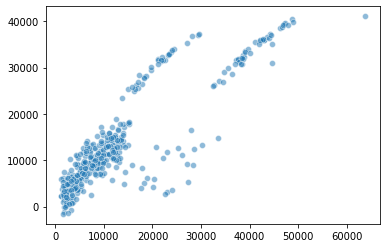

In [24]:
sns.scatterplot(y_test, y_pred, alpha=0.5)


In [25]:
print (X_test)

[[45.     0.    25.175  2.     0.     0.   ]
 [36.     0.    30.02   0.     0.     1.   ]
 [64.     0.    26.885  0.     1.     1.   ]
 ...
 [18.     0.    28.215  0.     0.     0.   ]
 [58.     1.    36.08   0.     0.     2.   ]
 [20.     1.    22.     1.     0.     3.   ]]


In [26]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [27]:
print (y_test)

[ 9095.06825   5272.1758   29330.98315   9301.89355  33750.2918
  4536.259     2117.33885  14210.53595   3732.6251   10264.4421
 18259.216     7256.7231    3947.4131   46151.1245   48673.5588
 44202.6536    9800.8882   42969.8527    8233.0975   21774.32215
  5080.096     7441.501     1256.299     2755.02095  11085.5868
 10923.9332   12644.589    18804.7524    9715.841     1131.5066
 15828.82173  11842.62375   2020.5523    5693.4305    2904.088
  7448.40395   2597.779     7337.748    23887.6627   38709.176
  4687.797     2643.2685   11674.13     12124.9924    4889.9995
 12333.828     3579.8287    4391.652    42124.5153    4463.2051
 13887.204     1719.4363   28476.73499   1708.92575  10594.2257
 25333.33284   3645.0894   38746.3551   11848.141    10564.8845
 13880.949     4753.6368   27941.28758   8017.06115  23045.56616
  4133.64165  17942.106    25992.82104   3594.17085   1682.597
  6079.6715    9411.005     8283.6807    6338.0756    7152.6714
  4889.0368    4846.92015  11454.0215    

In [37]:
x_pred = np.array( [[36.0, 0,30.02, 0 ,0, 1.0],[64.0, 0.,26.885,0., 1.,1.]])
x_pred = x_pred.reshape(-1, 6)

In [38]:
model.predict(x_pred)

array([ 7070.90670308, 36937.08049605])